# Libraries imported

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from copy import deepcopy

# Generate Random Data

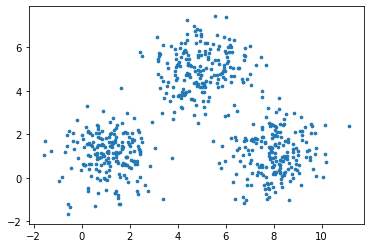

In [3]:
# Set three centers,the moel should predict similar resuls

center_1 = np.array([1,1])
center_2 = np.array([5,5])
center_3 = np.array([8,1])

#Generate random data and center it to the three centers

data_1 = np.random.randn(200,2) + center_1
data_2 = np.random.randn(200,2) + center_2
data_3 = np.random.randn(200,2) + center_3

data = np.concatenate((data_1, data_2, data_3), axis = 0)

plt.scatter(data[:,0], data[:,1], s=7)

# Create K-Means Algorithm

Generate random data normally distributed around 3 centers,with a noise

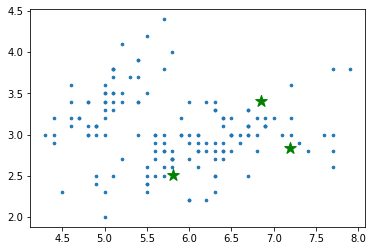

In [30]:
# Number of clusters
k = 3
#Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

#Generate random centers,here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers=np.random.randn(k, c)*std + mean

#plot the data and the centers generated as random
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [10]:
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

#when, after an update, the estimate of that center stays the same, exit loop

while error != 0:
    #Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis = 1)
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis = 0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[0.96229709, 1.03798873],
       [7.99598931, 1.10759952],
       [5.24124999, 4.93121507]])

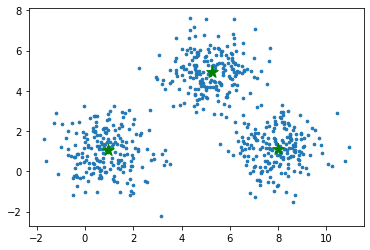

In [12]:
plt.scatter(data[:,0], data[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker = '*', c = 'g', s=150)

# Test on iris Dataset

In [17]:
df = pd.read_csv("C:\\Users\\91888\\OneDrive\\Desktop\\KAGGLE\\Iris.csv")
df.drop('Id', axis=1,inplace=True)

In [18]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [19]:
df["Species"] = pd.Categorical(df["Species"])
df["Species"] = df["Species"].cat.codes

data = df.values[:, 0:4]
category = df.values[:, 4]

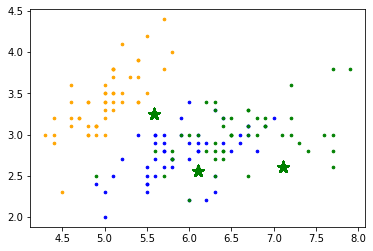

In [23]:
k = 3

n = data.shape[0]
c = data.shape[1]

mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

colors = ['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i, 1], s=7, color = colors[int(category[i])])
    plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [26]:
centers_old = np.zeros(centers.shape)
centers_new = deepcopy(centers)

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

while error != 0:
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    clusters = np.argmin(distances,axis = 1)
    centers_old = deepcopy(centers_new)
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new

array([[6.77755102, 2.94897959, 5.43265306, 1.86530612],
       [4.5       , 2.3       , 1.3       , 0.3       ],
       [5.399     , 3.113     , 2.963     , 0.881     ]])

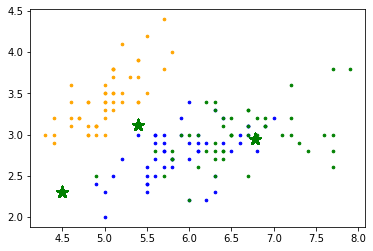

In [27]:
colors = ['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0],data[i,1], s=7, color = colors[int(category[i])])
    plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)